# CNN Model

- input = image

- output = score (Mean Vol After Open / Mean Vol Before Open) 

### 0. Installation (torch & fastai)

In [10]:
# pip install torch===1.7.0 torchvision===0.8.1 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

In [11]:
# pip install fastai

In [12]:
# pip install --upgrade pip

In [13]:
#pip show fastai

In [1]:
import torch
from fastai.vision.all import *
from fastai.metrics import error_rate

/home/sehara/.local/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
#torch.cuda.empty_cache()

In [16]:
# print(torch.version.cuda)

In [6]:
#torch.cuda.is_available()

In [7]:
#torch.cuda.set_device(0)

In [8]:
#torch.cuda.get_device_name()

### 1. Data Prep

In [18]:
data = (ImageDataLoaders.from_csv('../data/imgs/all', 'image_label_dir.csv', valid_pct=0.2, seed=10, item_tfms=Resize(224), bs = 5, num_workers = 0))
#         .random_split_by_pct(valid_pct=0.2, seed=10))
#         .split_by_idxs(list(range(400)), list(range(400,496))))
#                  .label_from_df()
#                  .databunch())

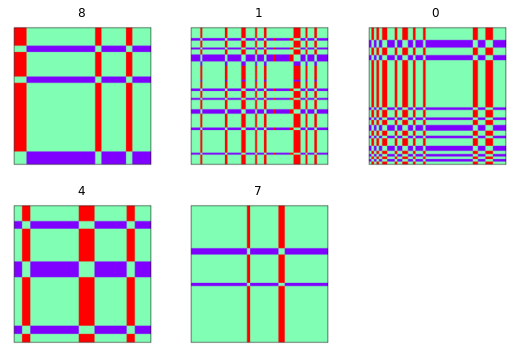

In [19]:
data.show_batch()

### 2. cnn model

In [20]:
learner = cnn_learner(data, models.resnet34, loss_func=mae, metrics=error_rate).to_fp16()
learner.model[1]

/home/sehara/.local/lib/python3.7/site-packages/torch/cuda/amp/autocast_mode.py:114: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=1024, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=10, bias=False)
)

### Tuning Model

In [21]:
### Finding learning rate
learner.lr_find()
learner.recorder.plot(suggestion=True)

/home/sehara/.local/lib/python3.7/site-packages/torch/cuda/amp/grad_scaler.py:115: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


AssertionError: ==:
50
5

In [ ]:
mingradlr = learner.recorder.min_grad_lr